In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, roc_auc_score, f1_score, mean_absolute_error, classification_report 
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

Análise Exploratória dos Dados

In [9]:
data_location = "../Data/card_transdata.csv"
data = pd.read_csv(data_location, sep = ",")

In [10]:
data.shape

(1000000, 8)

In [11]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Verificando se há dados nulos

In [12]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [13]:
data.fraud.unique()

array([0., 1.])

In [14]:
print('\nConjunto de dados, linhas e colunas\n')
print('The shape of the data set is:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Checking for missing values: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')

print('\nCheck balanceamento da target fraud\n')
print(data['fraud'].value_counts())
print('\n---------------------------------------------\n')


Conjunto de dados, linhas e colunas

The shape of the data set is: (1000000, 8)

---------------------------------------------


Check valores nulos

Checking for missing values: 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

---------------------------------------------


Estatísticas

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985  

Observando a distribuição dos dados

In [15]:
# Quais variáveis estão mais correlacionadas com a variável target?
#plt.figure(figsize = (20,10))
#plt.title('Correlation')
#sns.heatmap(data.corr(), 
#            annot = True, 
#            vmin = -1, 
#            cmap = 'Blues'
#           );
#plt.savefig("../img/Correlation1.png", dpi = 600 )

# Balanceamento da variável target

Vizualização da distribuição dos dados fraudados e não fraudados

fraud
0.0    912597
1.0     87403
dtype: int64

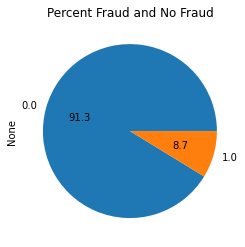

In [16]:
data.value_counts("fraud").plot.pie(autopct = "%.1f")
plt.title('Percent Fraud and No Fraud')
data.value_counts("fraud")
#plt.savefig("../img/pizza_fraud1.png", dpi = 600 )

In [ ]:
data.corr()

In [17]:
data['fraud'].value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

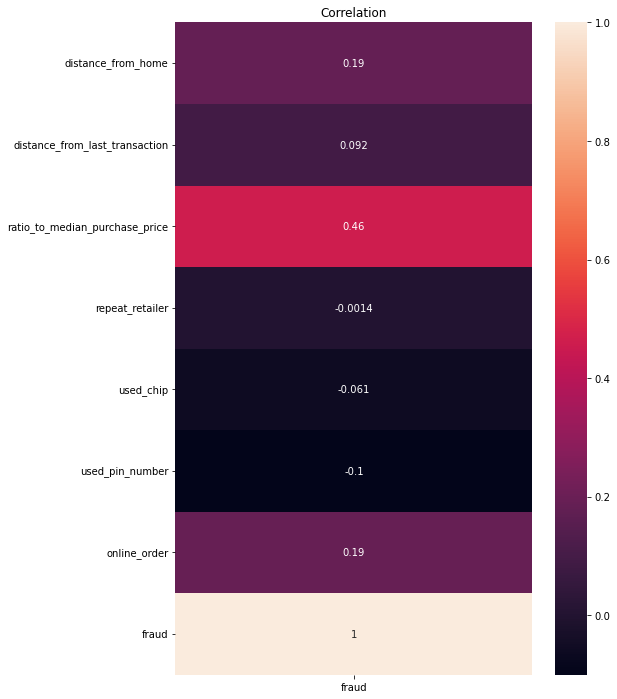

In [18]:
plt.figure(figsize = (8,12))
plt.title('Correlation')
sns.heatmap(data.corr()[['fraud']], 
            annot = True
           );
#plt.savefig("../img/Correlation2.png", dpi = 600 )

Criação de uma lista vazia para armazenar as métricas dos modelos

In [19]:
data_all=[]

Reduzindo o tamanho do dataset para 50000 registros

In [20]:
data_fraud= data.sample(n=50000)

In [22]:
data_fraud['fraud'].value_counts(normalize = True)

0.0    0.91286
1.0    0.08714
Name: fraud, dtype: float64

# Criação da base de treino e teste

In [23]:
X = data_fraud.drop(columns=['fraud'],axis=1)
y = data_fraud["fraud"]

Split da base reduzida com 30% para teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

Verificando colunas e linhas do dataset de treino e teste

In [122]:
print('X_test', X_test.shape)
print('X_train', X_train.shape)

X_test (12500, 7)
X_train (37500, 7)


Verificando quantidade de registros fraudados e não fraudados no dataset de treino

In [28]:
y_train.value_counts()

0.0    34232
1.0     3268
Name: fraud, dtype: int64

# Igualando a quantidade de registros de treino usando esquema undersampling

Criação dataset separado com mascara para fraudados e não fraudados no dataset de treino

In [41]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [52]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [53]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=1)

In [54]:
# fit and apply the transform
X_train_over, y_train_over = undersample.fit_resample(X_train, y_train)

In [121]:
y_test.value_counts()

0.0    11411
1.0     1089
Name: fraud, dtype: int64

In [120]:
y_train_over.value_counts()

0.0    3268
1.0    3268
Name: fraud, dtype: int64

In [63]:
print('X_train_over: ', X_train_over.shape)
print('y_train_over: ', y_train_over.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train_over:  (6536, 7)
y_train_over:  (6536,)
X_test:  (12500, 7)
y_test:  (12500,)


Padronização das features do modelos de treino e de teste

In [64]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_over)
X_test_std = scaler.transform(X_test)

# Modelo 1: Regressão Logística

Instanciando um objeto da classe LogisticRegression

In [66]:
lr = LogisticRegression()

Ajuste do modelo

In [67]:
lr.fit(X_train_std, y_train_over)

LogisticRegression()

Visualização dos coeficientes

In [68]:
print(lr.coef_)
print(lr.intercept_)

[[ 2.79455923  1.9728091   5.54704867 -0.47941802 -0.50066925 -2.67970895
   1.83967979]]
[0.26877522]


Previsão da acurácia com o modelo treinado

In [69]:
score_train_lr = accuracy_score(y_train_over, lr.predict(X_train_std))
print('Score train: ', score_train_lr)

Score train:  0.945532435740514


Matriz de confusão do modelo de treino

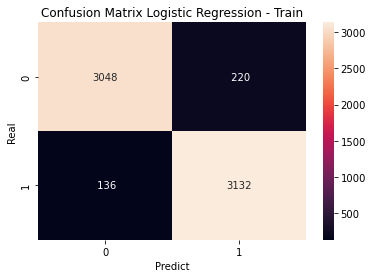

In [70]:
sns.heatmap(confusion_matrix(y_train_over, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix Logistic Regression - Train')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-LR-Train.png", dpi = 600 )

Observamos no treino que dos 3046 casos positivos de fraud 2922 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 94% das detecções de fraudes são positivas.

Previsão da acurácia com o modelo de teste

In [71]:
y_test_pred_lr = lr.predict(X_test_std)

Acurácia do modelo de teste

In [72]:
score_test_lr = accuracy_score(y_test, y_test_pred_lr)
print('Score test: ', score_test_lr)

Score test:  0.9336


Matriz de confusão do modelo de teste

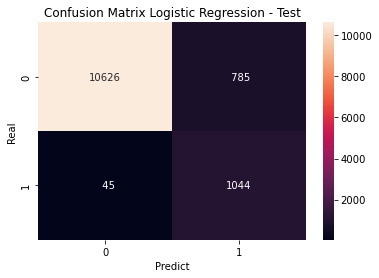

In [73]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix Logistic Regression - Test')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-LR-test.png", dpi = 600 )

Observamos no treino que dos 12.820 casos positivos de fraudes 61 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 93% das detecções de fraudes são positivas.

Métricas do modelo de teste

In [74]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred_lr, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      0.93      0.96     11411
     Fraud 1       0.57      0.96      0.72      1089

    accuracy                           0.93     12500
   macro avg       0.78      0.94      0.84     12500
weighted avg       0.96      0.93      0.94     12500



Inserindo as métricas na lista para armazenamento

In [75]:
m='Logistic Regression'
test_recall_lr = recall_score(y_test, y_test_pred_lr, pos_label=1)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_test_pred_lr, pos_label=1)
test_auc_lr = auc(fpr_lr,tpr_lr)
f1_score_lr = f1_score(y_test, y_test_pred_lr)
data_all.append([m,score_train_lr,score_test_lr,test_recall_lr,test_auc_lr,f1_score_lr])

# Modelo 2: Randon Forest

Instanciando a classe Randon Forest

In [76]:
rf=RandomForestClassifier()

Treino do modelo usando os conjuntos de treinamento y_pred=clf.predict(X_test)

In [77]:
rf.fit(X_train_std, y_train_over)

RandomForestClassifier()

Previsão da acurácia com o modelo de teste

In [78]:
score_train_rf = accuracy_score(y_train_over, rf.predict(X_train_std))
print('Score train: ', score_train_rf)

Score train:  1.0


Atribuindo A variável y_test_pred a previsão

In [79]:
y_test_pred_rf = rf.predict(X_test_std)

Atribuindo a variável score_test a acurácia

In [80]:
score_test_rf = accuracy_score(y_test, y_test_pred_rf)
print('Score test: ', score_test_rf)

Score test:  0.99824


Matriz de confusão do modelo de treino

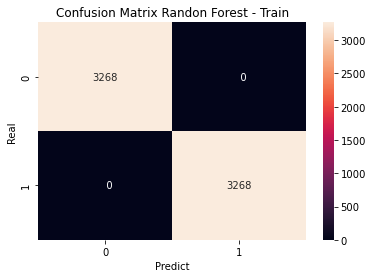

In [81]:
sns.heatmap(confusion_matrix(y_train_over, rf.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix Randon Forest - Train')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-RF-train.png", dpi = 600 )

Matriz de confusão do modelo de teste

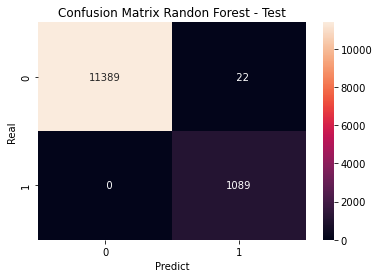

In [82]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix Randon Forest - Test')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-RF-test.png", dpi = 600 )

Observando as métricas

In [83]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred_rf, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      1.00      1.00     11411
     Fraud 1       0.98      1.00      0.99      1089

    accuracy                           1.00     12500
   macro avg       0.99      1.00      0.99     12500
weighted avg       1.00      1.00      1.00     12500



Inserindo as métricas na lista para armazenamento

In [84]:
m='Randon Forest'
test_recall_rf = recall_score(y_test, y_test_pred_rf, pos_label=1)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_test_pred_rf, pos_label=1)
test_auc_rf = auc(fpr_rf,tpr_rf)
f1_score_rf = f1_score(y_test, y_test_pred_rf)
data_all.append([m,score_train_rf,score_test_rf,test_recall_rf,test_auc_rf,f1_score_rf])

# Modelo 3: KNeighborsClassifier

Escolha da escolher metrica (Euclidean,  Manhattan ou Chebyshev)
Escolher com quantos vizinhos a quantidade de vizinhos próximos pelo modelo de validação cruzada.

In [85]:
# Usamos cross validation co, 5 folds
kf = KFold(n_splits = 5, shuffle = True, random_state = 12)
scores_para_df = []
for i in range(1, 26):
# Em cada iteração, instanciamos o modelo com um hiperparâmetro diferente
    model_euclidean = KNeighborsClassifier(metric = 'euclidean', n_neighbors = i)
    model_manhattan = KNeighborsClassifier(metric = 'manhattan', n_neighbors = i)
    model_chebyshev = KNeighborsClassifier(metric = 'chebyshev', n_neighbors = i)
# cross_val_scores retorna uma matriz de 5 resultados,
# um para cada partição que automaticamente criou CV
    cv_scores = cross_val_score(model_euclidean, X_train_std, y_train_over, cv = kf)
    cv_scores2 = cross_val_score(model_manhattan, X_train_std, y_train_over, cv = kf)
    cv_scores3 = cross_val_score(model_chebyshev, X_train_std, y_train_over, cv = kf)
# Para cada valor de n_neighbours, criamos um dicionário com o valor
# de n_neighbours e a média das pontuações
    dict_row_score = { 'n_neighbors': i, 'euclidean': np.mean(cv_scores),'manhattan': np.mean(cv_scores2),'chebyshev': np.mean(cv_scores3)}

# Salvamos cada um na lista definida fora do loop
    scores_para_df.append(dict_row_score)

De acordo com os vizinhos próximos as 3 melhores accuracy das metricas estão grifadas em amarelo

In [86]:
df_scores = pd.DataFrame(scores_para_df)

In [87]:
df_scores.style.highlight_max(subset=['euclidean','manhattan','chebyshev'])

,n_neighbors,euclidean,manhattan,chebyshev
0,1,0.992198,0.991738,0.991738
1,2,0.989291,0.989597,0.987302
2,3,0.990514,0.990667,0.989749
3,4,0.990820,0.991432,0.989290
4,5,0.988219,0.990361,0.987913
5,6,0.989290,0.989290,0.987760
6,7,0.987300,0.987913,0.985618
7,8,0.987607,0.989290,0.985618
8,9,0.986536,0.986842,0.985006
9,10,0.986383,0.988066,0.984241


Conforme identificado acima qual melhor parâmetro de distância e vizinhos se aplica ao modelo.

In [88]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1)

Treino do modelo usando a distancia e métrica identificada

In [89]:
knn.fit(X_train_std, y_train_over);

Previsão com o modelo de teste

In [90]:
y_test_pred_knn = knn.predict(X_test_std)

Previsão valores e a acurácia

In [91]:
accuracy_score(y_test, y_test_pred_knn).round(4)

0.9882

In [92]:
score_train_knn = accuracy_score(y_train_over, knn.predict(X_train_std))
print('Score train: ', score_train_knn)

Score train:  1.0


In [93]:
score_test_knn = accuracy_score(y_test, y_test_pred_knn)
print('Score test: ', score_test_knn)

Score test:  0.98816


Matriz de confusão modelo treino

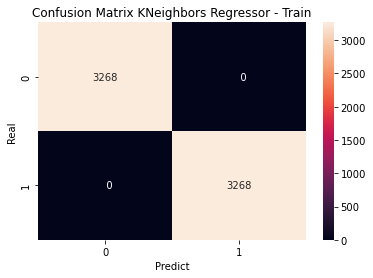

In [94]:
sns.heatmap(confusion_matrix(y_train_over, knn.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix KNeighbors Regressor - Train')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-knn-train.png", dpi = 600 )

Matriz de confusão modelo teste

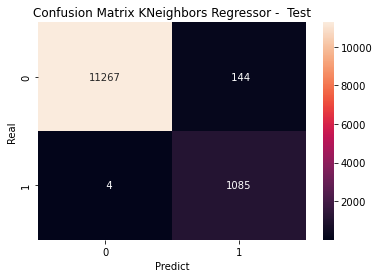

In [95]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix KNeighbors Regressor -  Test')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-knn-test.png", dpi = 600 )

Observando as métricas

In [96]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred_knn, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      0.99      0.99     11411
     Fraud 1       0.88      1.00      0.94      1089

    accuracy                           0.99     12500
   macro avg       0.94      0.99      0.96     12500
weighted avg       0.99      0.99      0.99     12500



Inserindo as métricas na lista para armazenamento

In [97]:
m='KNN'
test_recall_knn = recall_score(y_test, y_test_pred_knn, pos_label=1)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_test_pred_knn, pos_label=1)
test_auc_knn = auc(fpr_knn,tpr_knn)
f1_score_knn = f1_score(y_test, y_test_pred_knn)
data_all.append([m,score_train_knn,score_test_knn,test_recall_knn,test_auc_knn,f1_score_knn])

# Modelo 4: Decision Tree Classifier

Intanciando a classe Decison Tree Classifier, definimos o random_state de 12

In [98]:
dt = DecisionTreeClassifier(random_state=12)

Treino do modelo 

In [99]:
dt.fit(X_train_std, y_train_over)

DecisionTreeClassifier(random_state=12)

Previsão valores e a acurácia

In [100]:
y_test_pred_dt = dt.predict(X_test_std)

Previsão acurácia de treino

In [101]:
score_train_dt = accuracy_score(y_train_over, dt.predict(X_train_std))
print('Score train: ', score_train_dt)

Score train:  1.0


Previsão acurácia de teste

In [102]:
score_test_dt = accuracy_score(y_test, y_test_pred_dt)
print('Score test: ', score_test_dt)

Score test:  0.99832


Imprimindo a media aboluta

In [103]:
mean_abs_dt = mean_absolute_error(y_test, y_test_pred_dt)
print('Mean Absolute Error: ', mean_abs_dt)

Mean Absolute Error:  0.00168


Criando a matriz de confusão modelo treino

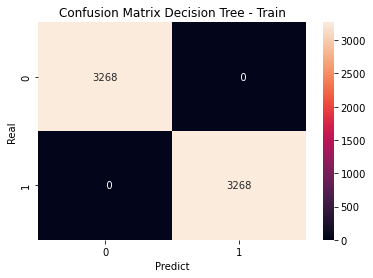

In [104]:
sns.heatmap(confusion_matrix(y_train_over, dt.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix Decision Tree - Train')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-DT-train.png", dpi = 600 )

Criando a matriz de confusão modelo teste

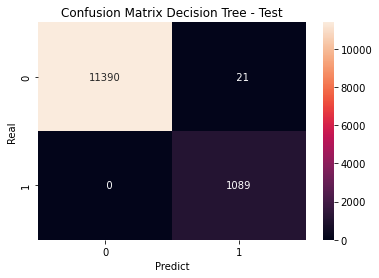

In [105]:
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.title('Confusion Matrix Decision Tree - Test')
plt.xlabel('Predict')
plt.ylabel('Real');
plt.savefig("../img/confusion-DT-test.png", dpi = 600 )

In [106]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred_dt, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      1.00      1.00     11411
     Fraud 1       0.98      1.00      0.99      1089

    accuracy                           1.00     12500
   macro avg       0.99      1.00      0.99     12500
weighted avg       1.00      1.00      1.00     12500



Inserindo as métricas na lista para armazenamento

In [107]:
m='DT'
test_recall_dt = recall_score(y_test, y_test_pred_dt, pos_label=1)
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_test_pred_dt, pos_label=1)
test_auc_dt = auc(fpr_dt,tpr_dt)
f1_score_dt = f1_score(y_test, y_test_pred_dt)
data_all.append([m,score_train_dt,score_test_dt,test_recall_dt,test_auc_dt,f1_score_dt])

### Calculando as probabilidades para a previsão 

In [108]:
r_probs = [0 for _ in range (len(y_test))]
lr_probs = lr.predict_proba(X_test_std)
rf_probs = rf.predict_proba(X_test_std)
knn_probs = knn.predict_proba(X_test_std)
dt_probs = dt.predict_proba(X_test_std)

In [109]:
lr_probs = lr_probs[:,1]
rf_probs = rf_probs[:,1]
knn_probs = knn_probs[:,1]
dt_probs = dt_probs[:,1]

In [110]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

Imprimindo AUROC scores com os modelos Logistic Regression, Randon Forest e Decision Tree

In [111]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('KNeighbors Regressor: AUROC = %.3f' % (knn_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.979
Random Forest: AUROC = 1.000
KNeighbors Regressor: AUROC = 0.992
Decision Tree: AUROC = 0.999


Calculando a Curva ROC dos modelos

In [112]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

Plotando a curva ROC

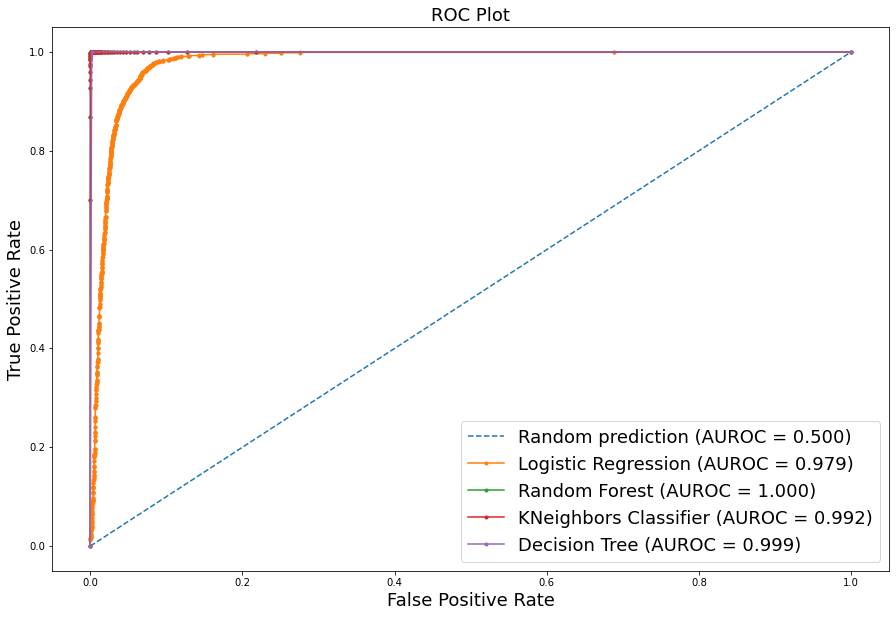

In [113]:
plt.figure(figsize = (15,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbors Classifier (AUROC = %0.3f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot', fontsize=18)
# Axis labels
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# Show legend
plt.legend(fontsize=18) # 
# Show plot
plt.savefig("../img/ROC-plot.png", dpi = 1000 )
plt.show()

### Resumo das métricas dos modelos

Atribuindo nome das colunas no dataframe de métricas e imprimindo as informações de todos modelos.

In [114]:
models=['Logistic','Randon Forest', 'KNeighbors','Decision Tree']
pd_scores=pd.DataFrame(data_all,columns=['model','train acuracy','test acuracy','test recall','test_auc','F1 Score'])
print(pd_scores)

                 model  train acuracy  test acuracy  test recall  test_auc  \
0  Logistic Regression       0.945532       0.93360     0.958678  0.944942   
1        Randon Forest       1.000000       0.99824     1.000000  0.999036   
2                  KNN       1.000000       0.98816     0.996327  0.991854   
3                   DT       1.000000       0.99832     1.000000  0.999080   

   F1 Score  
0  0.715559  
1  0.990000  
2  0.936152  
3  0.990450  


In [115]:
pd_scores.style.format({"train score": "${:20,.0f}",
                 "test score": "${:20,.0f}",
                 "test recall": "${:20,.0f}",
                 "test_auc":"${:20,.0f}",
                 "F1 Score":"${:20,.0f}",
                })\
                 .format({"model": lambda x:x.lower()})\
                 .background_gradient(cmap='Blues')

,model,train acuracy,test acuracy,test recall,test_auc,F1 Score
0,logistic regression,0.945532,0.933600,0.958678,0.944942,0.715559
1,randon forest,1.000000,0.998240,1.000000,0.999036,0.990000
2,knn,1.000000,0.988160,0.996327,0.991854,0.936152
3,dt,1.000000,0.998320,1.000000,0.999080,0.990450


## Diagramas de Confiabilidade

Vizualização de quão bem calibradas as probabilidades previstas estão usando curvas de calibração nos modelos de treino

In [116]:
gnb = GaussianNB()

clf_list = [
    (lr, "Logistic"),
    (rf, "RandomForest"),
    (knn, "KNeighbors"),
    (gnb, "Naive Bayes"),
    (dt, "DecisionTree")
]



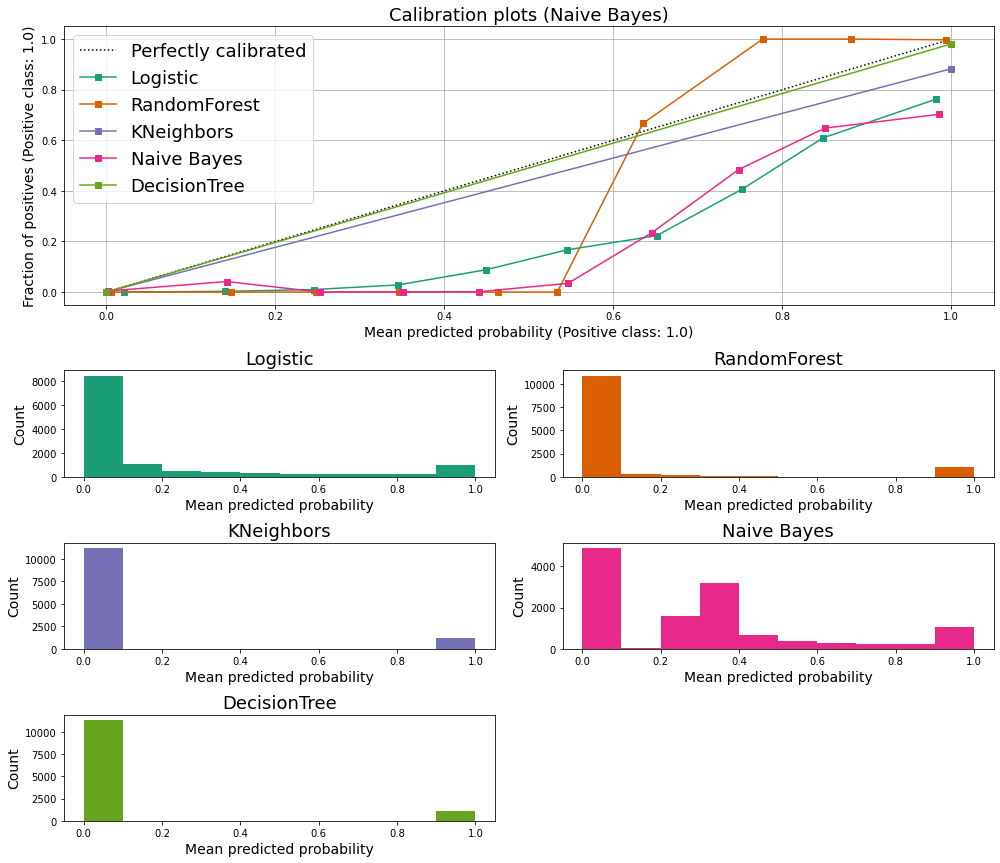

In [117]:
fig = plt.figure(figsize=(14, 14))
gs = GridSpec(6, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train_std, y_train_over)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_std,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)", fontsize=18)
ax_calibration_curve.set_xlabel("Mean predicted probability (Positive class: 1.0)", fontsize=14)
ax_calibration_curve.set_ylabel("Fraction of positives (Positive class: 1.0)", fontsize=14)
ax_calibration_curve.legend(fontsize=18)

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])
    
    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i)
    )
    #ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")
    ax.set_title(name, fontsize=18)
    ax.set_xlabel("Mean predicted probability", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
     
plt.tight_layout()
plt.savefig("../img/CalibrationDisplay-plot.png", dpi = 900 )
plt.show()
